In [1]:
import numpy as np
import numpy.random as rd
import pandas as pd
import scipy.stats as st
import copy

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

## 今回対象とする分布

In [2]:
# 確率関数から正規化定数を除いたもの
def P(x1, x2, b):
    assert np.abs(b) < 1
    return np.exp(-0.5*(x1**2 - 2*b*x1*x2 + x2**2))


## アニメーションで150個のサンプリングを可視化する

In [88]:
# parameters
b = 0.5            # 対象分布の共分散
delta = 1          # 提案分布の標準偏差
dist_type = "norm" # 提案分布の種別("norm" or "unif")
print "提案分布の種別:", dist_type

num_frame = 150.   # アニメーションのトータルフレーム数

# サンプリング結果を格納するリスト
sample = []
# 1:accept, 0:rejectを格納するリスト
acc_rej = [] 

# 初期位置の設定とサンプリング結果リストへの格納
current = (3, 3)
sample.append(current)

提案分布の種別: norm


In [92]:
def animate(nframe):
    global current, acc_rej
    print nframe,       # 進捗状況の表示

    # 提案分布による次のステップの選択
    # dist_type: "norm":正規分布 / "unif"：一様分布
    if dist_type == "norm":
        next = (current[0] + rd.normal(0, delta), current[1] + rd.normal(0, delta))
    else:
        next = (current[0] + rd.uniform(-delta, delta), current[1] + rd.uniform(-delta, delta))

    P_prev = P(current[0], current[1], b)   # 現在位置における目標分布の確率密度(に比例した数値)
    P_next = P(next[0], next[1], b)         # 次の候補位置における目標分布の確率密度(に比例した数値)

    # 上記の２つの値の比をとる
    r = P_next/P_prev
    
    # グラフの左上にAccept / Reject を表示する枠を表示
    ax = fig.add_subplot(111)
    rect = plt.Rectangle((-3.8,3.2), 1.1, .5,fc="#ffffff", zorder=nframe)
    ax.add_patch(rect)
    
    # 現在位置から次の候補位置への移動パスを表す点線を引く
    plt.plot([current[0], next[0]], [current[1], next[1]], "k--", lw=.3, color="gray") 
    
    if r > 1 or r > rd.uniform(0, 1):
        # 0-1の一様乱数がrより大きい時は状態を更新する。 
        current = copy.copy(next)
        sample.append(current)
        
        if nframe < num_frame*.2:
            # イテレーション回数の最初の20%はBurn-in期間と考える(プロットの色を薄くして示す）
            alpha = 0.2
        else:
            # 通常期間は点の濃さを戻す
            alpha = 0.8
            # acceptを記録
            acc_rej.append(1)
            
        # 採択(Accept)なので、点をプロットする。
        plt.scatter(current[0], current[1], alpha=alpha)
        plt.text(-3.7, 3.35, "Accept", zorder=nframe, fontdict={'color':"b"})
        
    else:  
        # 0-1の一様乱数がrより小さい時は棄却する。 
        # 棄却した時は x印をプロットする。
        plt.scatter(next[0], next[1], alpha=0.5, color="r", marker="x")
        plt.text(-3.7, 3.35, "Reject", zorder=nframe, fontdict={'color':"r"})
        
        if nframe <= num_frame*.2:
            # rejectを記録
            acc_rej.append(0)
     
    
    if nframe >= num_frame*.2:
        plt.title("cnt:{}".format(nframe+1))
    else:
        plt.title("cnt:{} [burn-in]".format(nframe+1))

    # グラフの描画範囲の設定
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 Accept ratio:0.83929


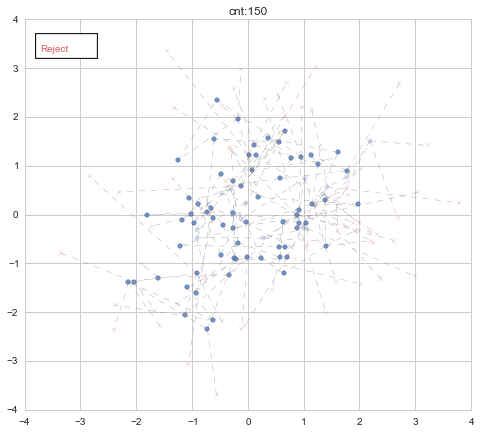

In [91]:
fig = plt.figure(figsize=(8,7))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('metropolis_norm.gif', writer='imagemagick', fps=3, dpi=96)

print "Accept ratio:{0:.5f}".format(np.mean(acc_rej))

## 提案分布の描画

norm
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39

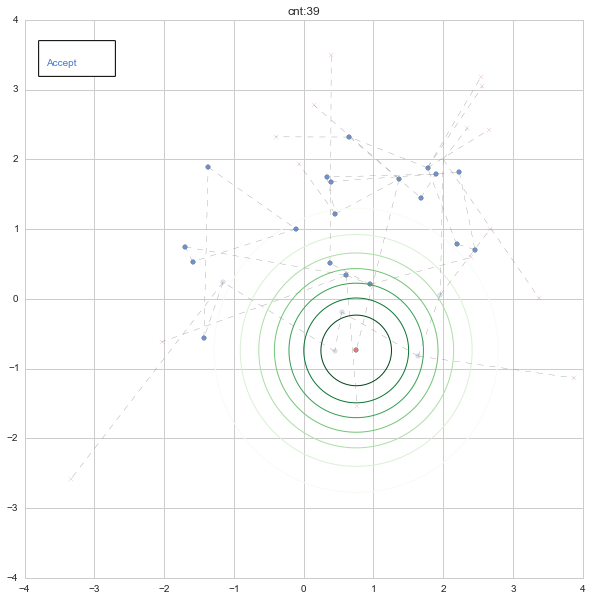

In [81]:
rd.seed(34357)

# parameters
b = 0.5
delta = 1
dist_type = "norm" # "norm" # "unif"

# result
sample = []

# 初期値
current = (2, 2)
sample.append(current)

print dist_type

num_frame = 43#150.
cnt = 0

def animate(nframe):
    global current, cnt
    print cnt, 

    # 提案分布による次のステップの選択
    # dist_type: "norm":正規分布 / "unif"：一様分布
    if dist_type == "norm":
        next = (current[0] + rd.normal(0, delta), current[1] + rd.normal(0, delta))
    else:
        next = (current[0] + rd.uniform(-delta, delta), current[1] + rd.uniform(-delta, delta))
       
    # frame 40の時だけ、提案分布の等高線を描画
    if nframe == 39:
        draw_contour(next[0], next[1],v=delta)
        c = "r"
    else:
        c = "b"

    P_prev = P(current[0], current[1], b)
    P_next = P(next[0], next[1], b)

    r = P_next/P_prev

    ax = fig.add_subplot(111)
    
    rect = plt.Rectangle((-3.8,3.2), 1.1, .5,fc="#ffffff", zorder=cnt)
    ax.add_patch(rect)
    
    plt.plot([current[0], next[0]], [current[1], next[1]], "k--", lw=.3, color="gray") 
    
    if r > 1 or r > rd.uniform(0, 1):
        # 0-1の一様乱数がrより大きい時は状態を更新する。 
        current = copy.copy(next)
        if nframe >= num_frame*.2:
            alpha = 0.8
        else:
            # イテレーション回数の20%はBurn-in期間と考える(プロットの色を薄くして示す）
            alpha = 0.2
        plt.scatter(current[0], current[1], alpha=alpha, c=c)
        plt.text(-3.7, 3.35, "Accept", zorder=cnt, fontdict={'color':"b"})
    else:  
        # 0-1の一様乱数がrより小さい時は棄却する。 
        plt.scatter(next[0], next[1], alpha=0.5, color="r", marker="x")
        plt.text(-3.7, 3.35, "Reject", zorder=cnt, fontdict={'color':"r"})

    sample.append(current) 
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
    if nframe >= num_frame*.2:
        plt.title("cnt:{}".format(cnt))
    else:
        plt.title("cnt:{} [burn-in]".format(cnt))

    cnt += 1

    
def draw_contour(x, y, v=1, sd=0):
    X, Y = np.meshgrid(np.linspace(-4, 4, 201), np.linspace(-4, 4, 201))

    point = np.column_stack([X.flatten(), Y.flatten()])
    mean = [x,y]
    cov =  [[v,  sd],
            [sd,  v]]
    Z = st.multivariate_normal.pdf(point, mean, cov)
    Z = Z.reshape(X.shape)
    plt.contour(X, Y, Z, cmap=cm.Greens, linewidths=1)

fig = plt.figure(figsize=(10,10))  
for i in range(40):
    animate(i)
plt.show()

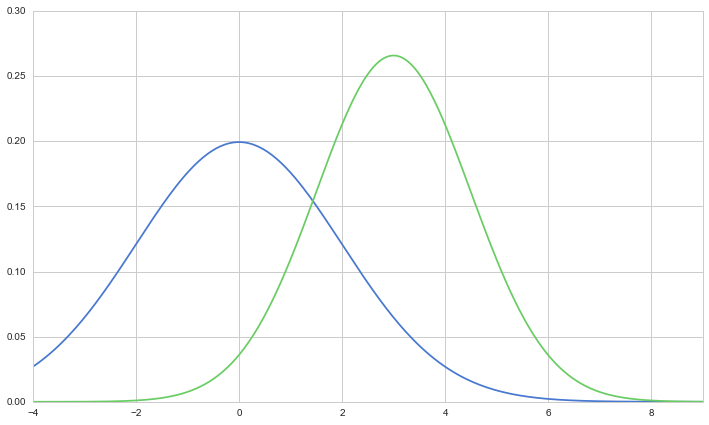

In [83]:
# 目標分布と提案分布
x = np.linspace(-4, 9, 301)
f1 = st.norm.pdf(x, 0, 2)
f2 = st.norm.pdf(x, 3, 1.5)

plt.figure(figsize=(12,7))
plt.plot(x, f1)
plt.plot(x, f2)

plt.xlim(-4, 9)
plt.ylim(0, 0.3)

plt.show()

## 10,000個のサンプリング実行

norm


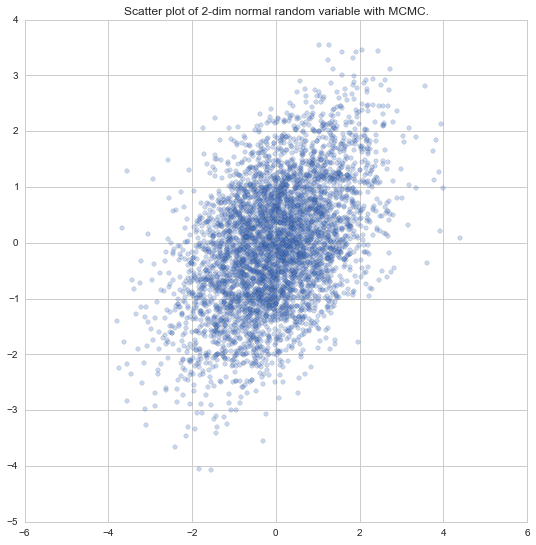

In [98]:
# parameters
b = 0.5
delta = 1
dist_type = "norm" # "norm" # "unif"

# result
sample = []

#initial state
current = (5, 5)
sample.append(current)

print dist_type

for i in range(10000):

    # candidate of next step
    if dist_type == "norm":
        next = (current[0] + rd.normal(0, delta), current[1] + rd.normal(0, delta))
    else:
        next = (current[0] + rd.uniform(-delta, delta), current[1] + rd.uniform(-delta, delta))

    P_prev = P(current[0], current[1], b)
    P_next = P(next[0], next[1], b)

    r = P_next/P_prev

    if r > 1 or r > rd.uniform(0, 1):
        # 0-1の一様乱数がrより大きい時は状態を更新する。 
        current = copy.copy(next)
        sample.append(current) 


sample = np.array(sample)
plt.figure(figsize=(9,9))
plt.scatter(sample[int(len(sample)*0.2):,0], sample[int(len(sample)*0.2):,1], alpha=0.3)
plt.title("Scatter plot of 2-dim normal random variable with MCMC.")
plt.show()

### xとyの平均値をトレース

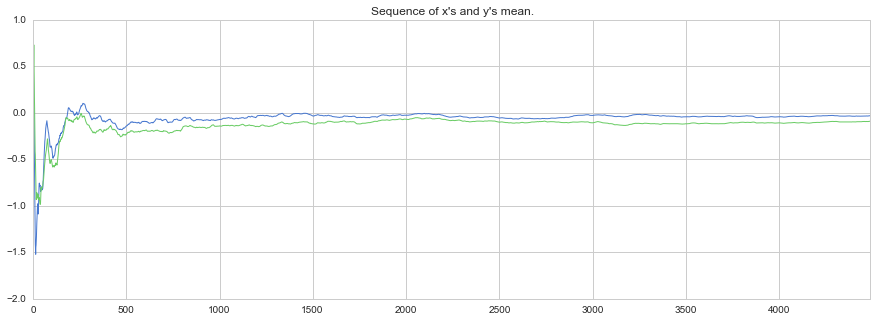

In [95]:
ave = [[],[]]

start = int(len(sample) * 0.2)
for i, d in enumerate(np.array(sample[start:])):
    #print d
    for j in range(2):
        if i == 0:
            ave[j].append(float(d[j]))
        else:
            ave[j].append( (ave[j][i-1]*i + d[j])/float(i+1) )


plt.figure(figsize=(15, 5))
plt.xlim(0, len(sample[int(start):]))
plt.plot(np.array(ave).T, lw=1)
plt.title("Sequence of x's and y's mean.")
plt.show()

### サンプリング結果のヒストグラム

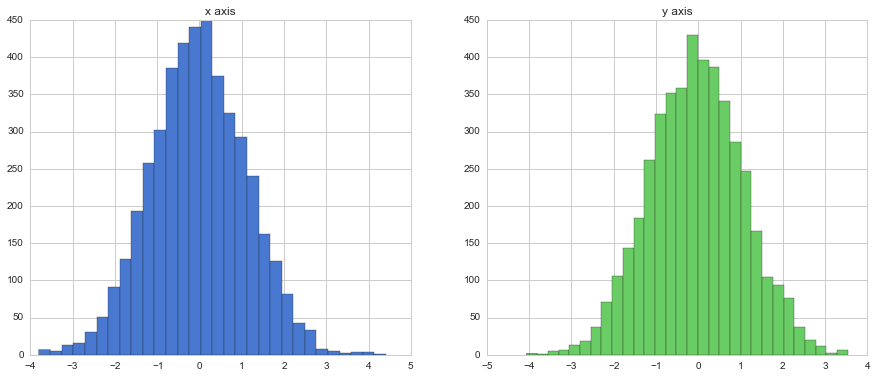

In [100]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
plt.hist(sample[start:,0], bins=30)
plt.title("x axis")

ax = fig.add_subplot(122)
plt.hist(sample[start:,1], bins=30, color="g")
plt.title("y axis")

plt.show()